In [95]:
import os
from os.path import join, getsize, getmtime
import datetime
import csv
import mimetypes
import humanize

accession_dir = "X:\school\data\Govdocs1-threads"

# function to identify file extension
def get_extension(name):
    result = None
    i = name.rfind('.')
    if i > 0:
        result = name[i+1:]
    return result

file_count = 0
with open('inventory.csv', 'w', newline='') as csvfile:
    mywriter = csv.writer(csvfile, quoting=csv.QUOTE_MINIMAL)
    mywriter.writerow(['name', 'path', 'bytes', 'bytes_humanized', 'modified', 'mod_year','extension', 'category', 'mimetype', 'folder1', 'folder2'])
    
    # This is where the "crawl" of files starts, using the Python os.walk() function
    for folder, subfolders, files in os.walk(accession_dir):
        # Walk gives us the folder name (folder), subfolders list, and file names list for each folder in our accession.
        for name in files:
            file_count = file_count + 1  # Count this file
            fullpath = join(folder, name)  # The full path to a file is made by joining file name and folder name.
            
            mod_dt = datetime.datetime.fromtimestamp(getmtime(fullpath))  # modified timestamp is converted into a Python date
            
            (mime, encoding) = mimetypes.guess_type(fullpath)  # Python mimetypes module will guess a mimetype
            if mime is None:
                mime = "application/octet-stream"  # This is a generic "stream of bytes" mimetype
            category = mime.split('/')[0]  # The high-level mimetype is the half before the slash '/', such as 'text' or 'image'
            
            folder_path = folder[len(accession_dir):]  # We trim off the accession folder path to get just the path within the accession.
            path_segments = folder_path.split('/')
            folder1 = path_segments[0]
            folder2 = path_segments[1] if len(path_segments) > 1 else '.'
            
            mywriter.writerow([name, folder_path,  # This writes a line to the CSV file 
                               getsize(fullpath),
                               humanize.naturalsize(getsize(fullpath)), # writes human readable size
                               mod_dt.isoformat(),
                               mod_dt.year,
                               get_extension(name),
                               category,
                               mime,
                               folder1,
                               folder2])
print("Inventory done: "+accession_dir)
print("Inventory file count:"+str(file_count))

<>:8: SyntaxWarning:

invalid escape sequence '\s'

<>:8: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\me\AppData\Local\Temp\ipykernel_22560\1172650083.py:8: SyntaxWarning:

invalid escape sequence '\s'



Inventory done: X:\school\data\Govdocs1-threads
Inventory file count:9876


In [94]:
with open('inventory.csv', 'r') as csvfile:
    lines = ''
    for x in range(0,6):
        lines = lines + csvfile.readline()
print(lines)

name,path,bytes,bytes_humanized,modified,mod_year,extension,category,mimetype,folder1,folder2
837083.jpg,\837,126197,126.2 kB,2007-08-04T00:09:11,2007,jpg,image,image/jpeg,\837,.
837352.gif,\837,10222,10.2 kB,2001-07-12T06:21:07,2001,gif,image,image/gif,\837,.
837447.jpg,\837,1007134,1.0 MB,2002-10-24T10:37:46,2002,jpg,image,image/jpeg,\837,.
837467.jpg,\837,6654,6.7 kB,2005-06-08T15:26:33,2005,jpg,image,image/jpeg,\837,.
837565.jpg,\837,1545812,1.5 MB,2001-07-12T02:52:52,2001,jpg,image,image/jpeg,\837,.



In [44]:
import pandas as pd
import numpy as np
df = pd.read_csv('inventory.csv')

display(df.head())
print('dimensions: '+ str(df.shape))

,name,path,bytes,bytes_humanized,modified,mod_year,extension,category,mimetype,folder1,folder2
0,837083.jpg,\837,126197,126.2 kB,2007-08-04T00:09:11,2007,jpg,image,image/jpeg,\837,.
1,837352.gif,\837,10222,10.2 kB,2001-07-12T06:21:07,2001,gif,image,image/gif,\837,.
2,837447.jpg,\837,1007134,1.0 MB,2002-10-24T10:37:46,2002,jpg,image,image/jpeg,\837,.
3,837467.jpg,\837,6654,6.7 kB,2005-06-08T15:26:33,2005,jpg,image,image/jpeg,\837,.
4,837565.jpg,\837,1545812,1.5 MB,2001-07-12T02:52:52,2001,jpg,image,image/jpeg,\837,.


dimensions: (9876, 11)


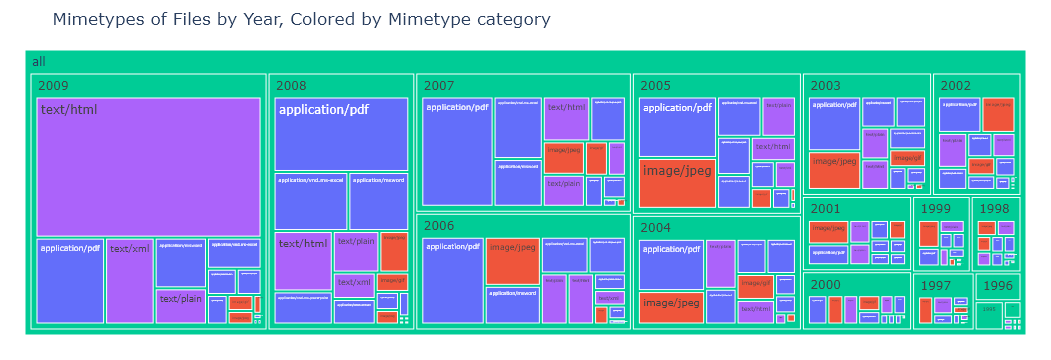

In [45]:
import plotly.express as px

fig = px.treemap(df,
                 title="Mimetypes of Files by Year, Colored by Mimetype category",
                 path=[px.Constant("all"), 'mod_year', 'mimetype'], 
                 color='category',
                 height=600
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

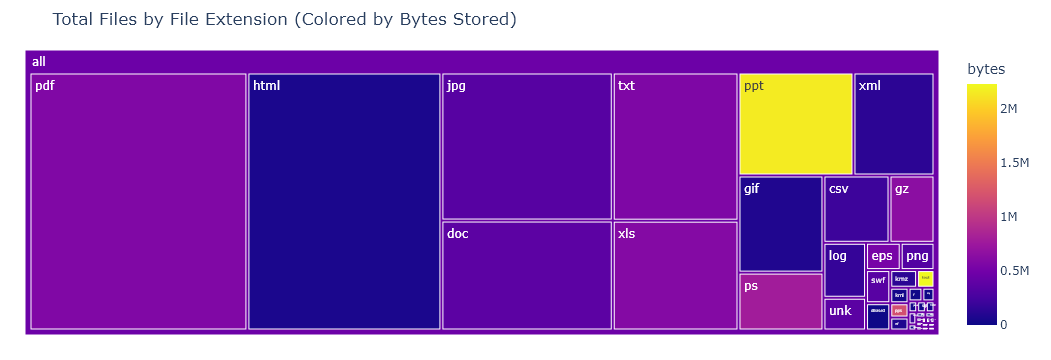

In [66]:
import plotly.express as px

fig = px.treemap(df,
                 title="Total Files by File Extension (Colored by Bytes Stored)",
                 path=[px.Constant("all"), 'extension'], 
                 color='bytes',
                 height=650
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [7]:
display(df["mimetype"].astype("category").value_counts().head(n=25))

mimetype
application/pdf                                                              2378
text/html                                                                    2117
image/jpeg                                                                   1073
application/msword                                                            807
text/plain                                                                    788
application/vnd.ms-excel                                                      772
application/vnd.ms-powerpoint                                                 512
application/octet-stream                                                      395
text/xml                                                                      353
image/gif                                                                     349
application/postscript                                                        248
image/png                                                                      39
applica

## Show files per year

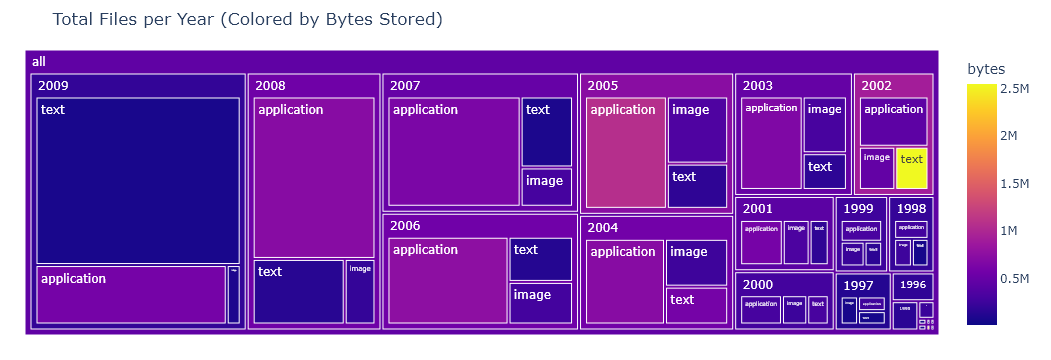

In [71]:
import plotly.express as px

fig = px.treemap(df,
                 title="Total Files per Year (Colored by Bytes Stored)",
                 path=[px.Constant("all"), 'mod_year', 'category'], 
                 color='bytes',
                 height=750
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## Using Brunnhilde

In [72]:
#import brunnhilde

!python -m brunnhilde -z X:\school\data\Govdocs1-threads brunnhilde

2025-05-04 22:36:46,992 - ERROR - Output directory already exists. To overwrite, use the -o/--overwrite option.
2025-05-04 22:36:46,992 - ERROR - Brunnhilde was unable to finish processing. Shutting down.


In [88]:
import pandas as pd
import numpy as np
df_brunnhilde = pd.read_csv('brunnhilde/csv_reports/years.csv')

display(df_brunnhilde.head())
print('dimensions: '+ str(df_brunnhilde.shape))

,Year Last Modified,Count
0,2009,2373
1,2008,1481
2,2007,1178
3,2006,1003
4,2005,945


dimensions: (22, 2)


In [170]:
import pandas as pd
import numpy as np
df_brunnhilde_ver = pd.read_csv('brunnhilde/csv_reports/formatVersions.csv')

display(df_brunnhilde_ver.head())
print('dimensions: '+ str(df_brunnhilde_ver.shape))

,Format,ID,Version,Count
0,Acrobat PDF 1.4 - Portable Document Format,fmt/18,1.4,926
1,Hypertext Markup Language,fmt/96,NaN,841
2,Plain Text File,x-fmt/111,NaN,838
3,Microsoft Word Document,fmt/40,97-2003,766
4,Hypertext Markup Language,fmt/100,4.01,549


dimensions: (100, 4)


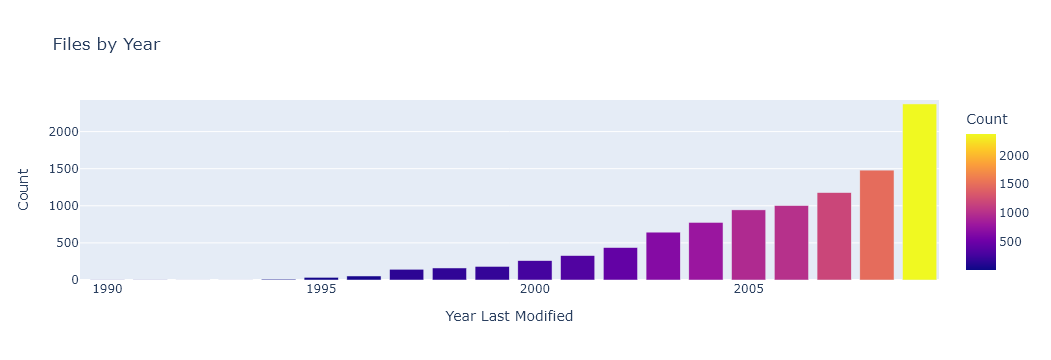

In [92]:
import plotly.express as px

fig = px.bar(df_brunnhilde, 
             x="Year Last Modified", 
             y="Count", 
             labels={'y':'Count'},
             color="Count", 
             title="Files by Year",
             height=500)
fig.show()

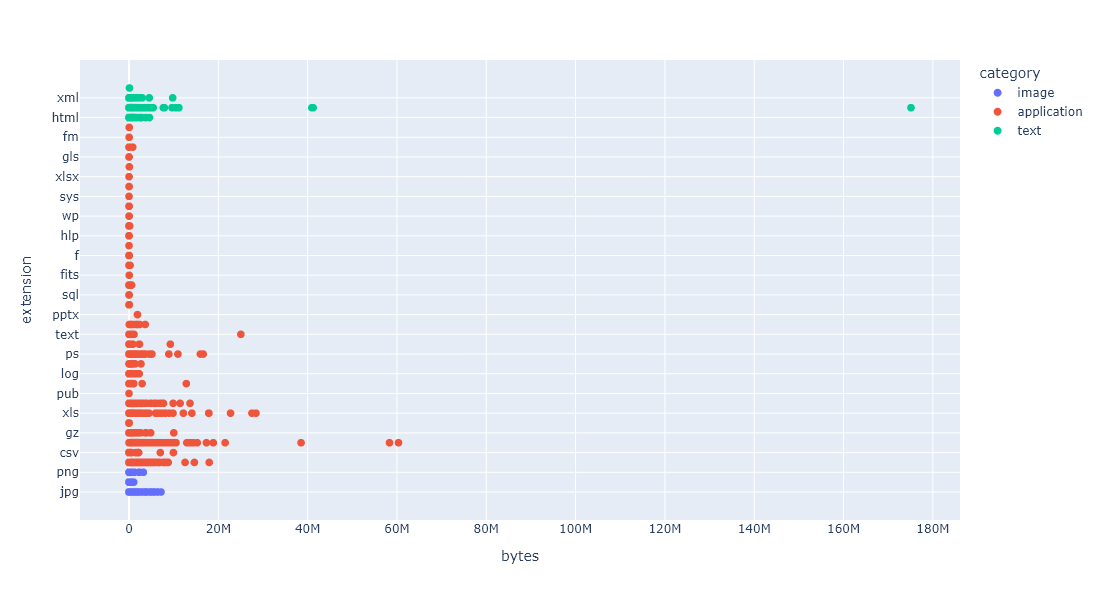

In [134]:
import plotly.express as px
fig = px.scatter(df, x='bytes', y='extension', color='category',height=600)
fig.update_traces(marker_size=8)
fig.update_layout(scattermode="group", scattergap=.25)
fig.show()

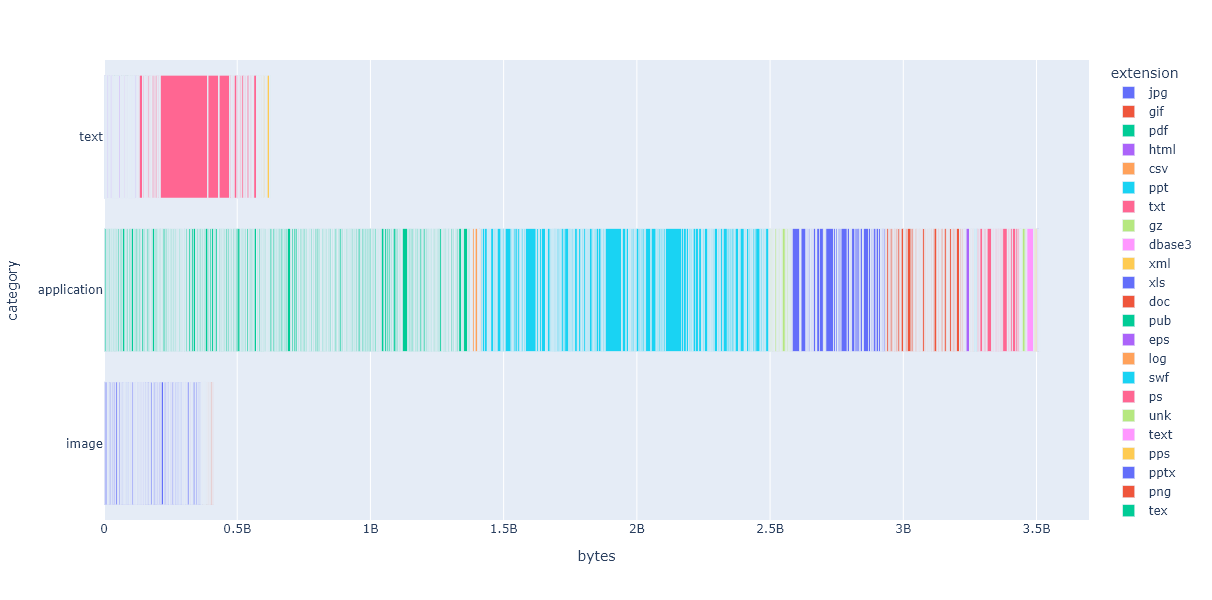

In [151]:
import plotly.express as px
fig = px.bar(df, x='bytes', y='category', color='extension',height=600, orientation='h', hover_data="name")
fig.show()

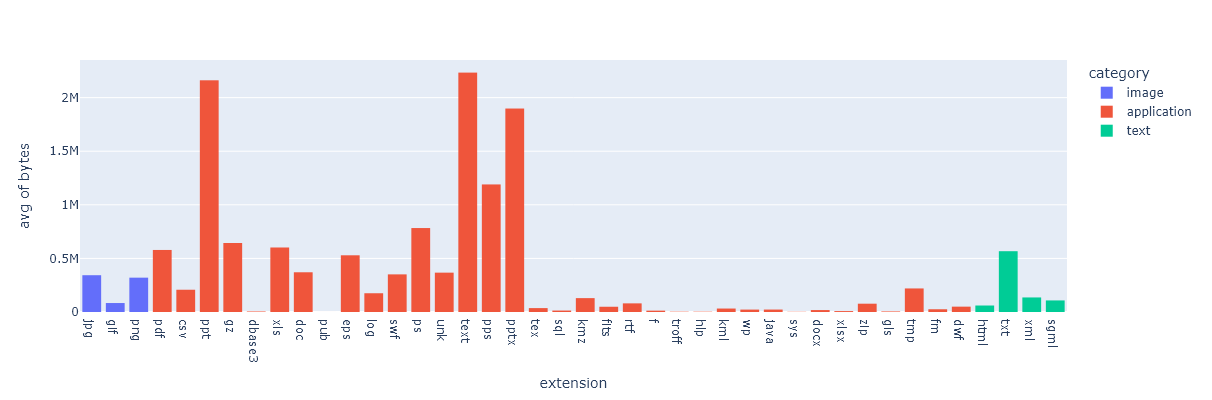

In [169]:
import plotly.express as px
fig = px.histogram(df, x="extension", y="bytes", color="category", hover_data=df.columns, histfunc='avg',height=400)
fig.show()